In [126]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [25]:
P = np.array(
    [
        [0.0, 0.5, 0.5, 0.0],
        [0.2, 0.0, 0.0, 0.8],
        [0.8, 0.0, 0.0, 0.2],
        [0.0, 0.2, 0.2, 0.6]
    ]
)

In [85]:
nS = 4

In [96]:
def plot_matrix(P):
    plt.imshow(P, cmap='Blues')
    for i in range(nS):
        for j in range(nS):
            p = np.around(P[i, j], 2)
            plt.text(j, i, p, ha='center', va='bottom', color='gray')
    plt.axis('off')
    plt.show()

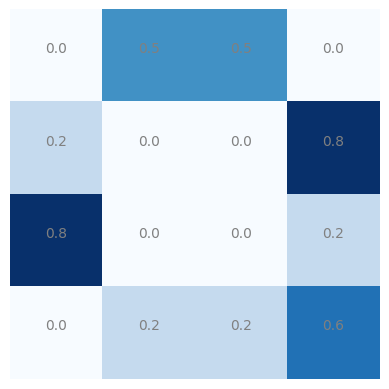

In [97]:
plot_matrix(P)

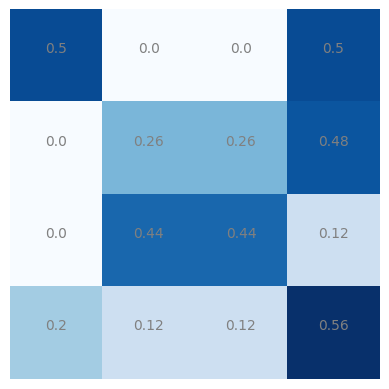

In [98]:
P_two_hop = P @ P
plot_matrix(P_two_hop)

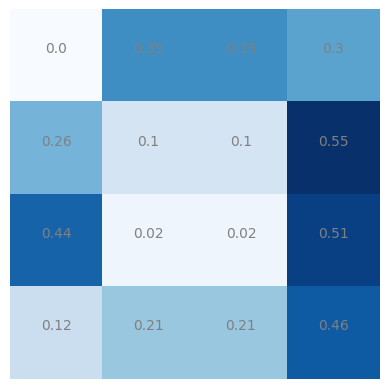

In [99]:
P_three_hop = P @ P @ P
plot_matrix(P_three_hop)

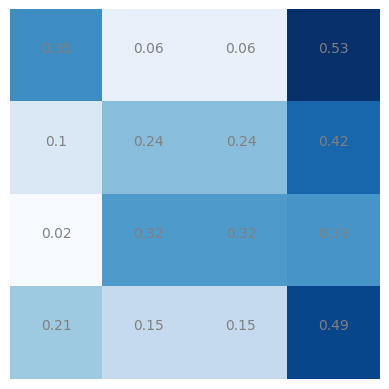

In [100]:
P_four_hops = P @ P @ P @ P
plot_matrix(P_four_hops)

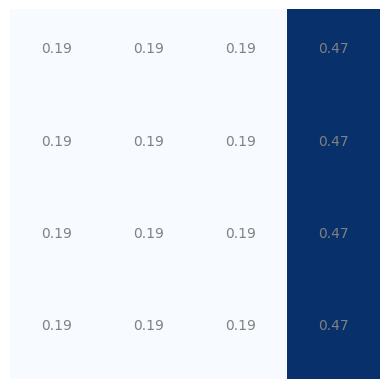

In [102]:
P_inf = P
for _ in range(50):
    P_inf = P_inf @ P_inf
plot_matrix(P_inf)

In [103]:
s = np.array([1, 0, 0, 0])
s @ P_inf

array([0.18676715, 0.18676715, 0.18676715, 0.46691788])

In [104]:
s = np.array([0.25, 0.25, 0.25, 0.25])
s @ P_inf

array([0.18676715, 0.18676715, 0.18676715, 0.46691788])

In [56]:
s = np.array([1, 0, 0, 0])
trace = [s]
for _ in range(40):
    s = s @ P
    trace.append(s)

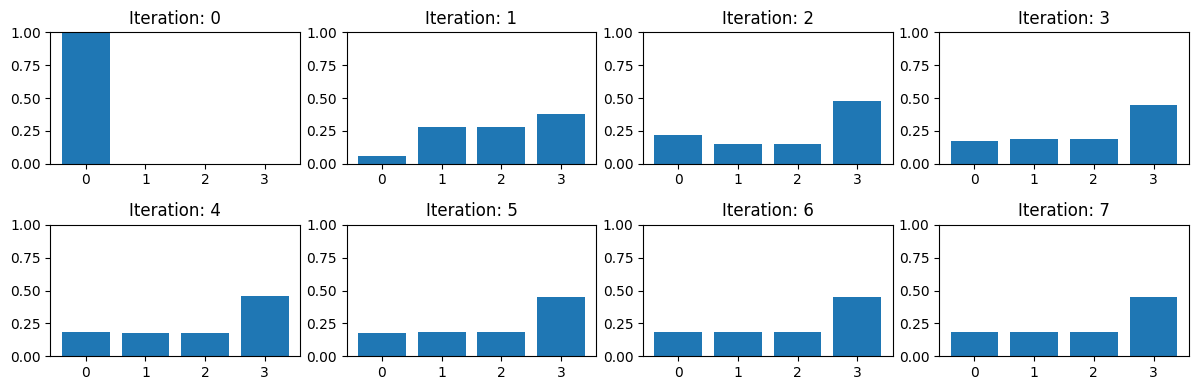

In [79]:
fig, axes = plt.subplots(2, 4, figsize=(12, 4))
axes = axes.flatten()
for i in range(8):
    axes[i].set_title(f'Iteration: {i}')
    axes[i].bar(range(s.size), trace[i*5])
    axes[i].set_ylim(0, 1)
plt.tight_layout()
plt.show()

In [128]:
w, vl, vr = scipy.linalg.eig(P, left=True)

In [144]:
np.around(w, 2)

array([-0.78+0.j,  1.  +0.j,  0.38+0.j, -0.  +0.j])

In [133]:
np.around(vl, 2)

array([[-0.63,  0.33, -0.48, -0.29],
       [ 0.49,  0.33, -0.18, -0.59],
       [ 0.49,  0.33, -0.18,  0.15],
       [-0.35,  0.82,  0.84,  0.74]])

In [138]:
s = vl[:, 1]
s /= s.sum()
s

array([0.18181818, 0.18181818, 0.18181818, 0.45454545])